In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
from pathlib import Path

In [2]:
# Set up paths dynamically
current_dir = Path.cwd()
project_root = current_dir.parent if current_dir.name == 'code' else current_dir
code_dir = project_root / 'code'
data_dir = project_root / 'data'
figures_dir = project_root / 'figures'

# Create directories if they don't exist
data_dir.mkdir(exist_ok=True)
figures_dir.mkdir(exist_ok=True)

# Add code directory to Python path
sys.path.append(str(code_dir))

print(f"Project root: {project_root}")
print(f"Code directory: {code_dir}")
print(f"Data directory: {data_dir}")
print(f"Figures directory: {figures_dir}")


Project root: /Users/harashimakoshi/CS332/332Project2
Code directory: /Users/harashimakoshi/CS332/332Project2/code
Data directory: /Users/harashimakoshi/CS332/332Project2/data
Figures directory: /Users/harashimakoshi/CS332/332Project2/figures


In [3]:
# Import custom modules
from A_afp import AdversarialFairPayoffs
from B_bp import BernoulliPayoffs
from C_pp import EspacePayoffs
from D_rp import ResearchPayoffs
from EW import ExponentialWeights
from MC import MonteCarloSimulation

In [4]:
# Fixed parameters
k = 5  # Number of Espace stores
n = 1000
num_simulations = 100  # Monte Carlo simulation times

# Epsilon values
epsilon_values = {
    'random': 0.01,  
    'optimal': np.sqrt(np.log(k) / n), 
    'FTL': 100  
}


# A

In [11]:
# AdversarialFairPayoffs environment

# Save results
results_data = []
payoff_progression_data = {}  # Store payoff progression data for plotting

for epsilon_name, epsilon_value in epsilon_values.items():
    print(f"\nRunning simulations for {epsilon_name} (epsilon = {epsilon_value:.6f})...")
    
    regret_histories = []
    total_payoffs = []
    payoff_histories = []  # Store payoff histories for progression analysis
    
    for sim in range(num_simulations):
        env = AdversarialFairPayoffs(k)
        algorithm = ExponentialWeights(k, epsilon=epsilon_value, n=n)
        
        # Run algorithm
        regret_history, total_payoff, cumulative_payoffs, payoff_history = algorithm.run_algorithm(env.generate_payoffs)
        
        regret_histories.append(regret_history)
        total_payoffs.append(total_payoff)
        payoff_histories.append(payoff_history)  # Store payoff progression
        
        if (sim + 1) % 20 == 0:
            print(f"  Completed {sim + 1}/{num_simulations} simulations")
    
    # Store payoff progression data for this epsilon type
    payoff_progression_data[epsilon_name] = {
        'rounds': list(range(1, n + 1)),
        'mean_payoff': np.mean(payoff_histories, axis=0).tolist(),
        'std_payoff': np.std(payoff_histories, axis=0).tolist(),
        'epsilon_value': epsilon_value
    }
    
    # Add results to dataframe
    regret_array = np.array(regret_histories)
    payoff_array = np.array(payoff_histories)
    mean_regret = np.mean(regret_array, axis=0)
    std_regret = np.std(regret_array, axis=0)
    mean_payoff = np.mean(payoff_array, axis=0)
    std_payoff = np.std(payoff_array, axis=0)
    final_regrets = regret_array[:, -1]
    final_payoffs = payoff_array[:, -1]
    
    for round_num in range(n):
        results_data.append({
            'round': round_num + 1,
            'epsilon_type': epsilon_name,
            'epsilon_value': epsilon_value,
            'mean_regret': mean_regret[round_num],
            'std_regret': std_regret[round_num],
            'mean_payoff': mean_payoff[round_num],
            'std_payoff': std_payoff[round_num],
            'final_regret_mean': np.mean(final_regrets),
            'final_regret_std': np.std(final_regrets),
            'final_payoff_mean': np.mean(final_payoffs),
            'final_payoff_std': np.std(final_payoffs)
        })

print("\nAll simulations completed!")

results_df = pd.DataFrame(results_data)

# Save results to csv file
adversarial_csv_path = data_dir / 'adversarial_fair_payoffs_results.csv'
results_df.to_csv(adversarial_csv_path, index=False)
print(f"Results saved to {adversarial_csv_path}")

# Statistical results
print("\nFinal regret statistics:")
for epsilon_name in research_eg_df["epsilon_type"].unique():
    subset = results_df[results_df['epsilon_type'] == epsilon_name]
    final_stats = subset.iloc[0]  
    print(f"  {epsilon_name}: Mean = {final_stats['final_regret_mean']:.4f}, Std = {final_stats['final_regret_std']:.4f}")



Running simulations for random (epsilon = 0.010000)...
  Completed 20/100 simulations
  Completed 40/100 simulations
  Completed 60/100 simulations
  Completed 80/100 simulations
  Completed 100/100 simulations

Running simulations for optimal (epsilon = 0.047985)...
  Completed 20/100 simulations
  Completed 40/100 simulations
  Completed 60/100 simulations
  Completed 80/100 simulations
  Completed 100/100 simulations

Running simulations for FTL (epsilon = 100.000000)...
  Completed 20/100 simulations
  Completed 40/100 simulations
  Completed 60/100 simulations
  Completed 80/100 simulations
  Completed 100/100 simulations

All simulations completed!
Results saved to /Users/harashimakoshi/CS332/332Project2/data/adversarial_fair_payoffs_results.csv

Final regret statistics:


NameError: name 'research_eg_df' is not defined

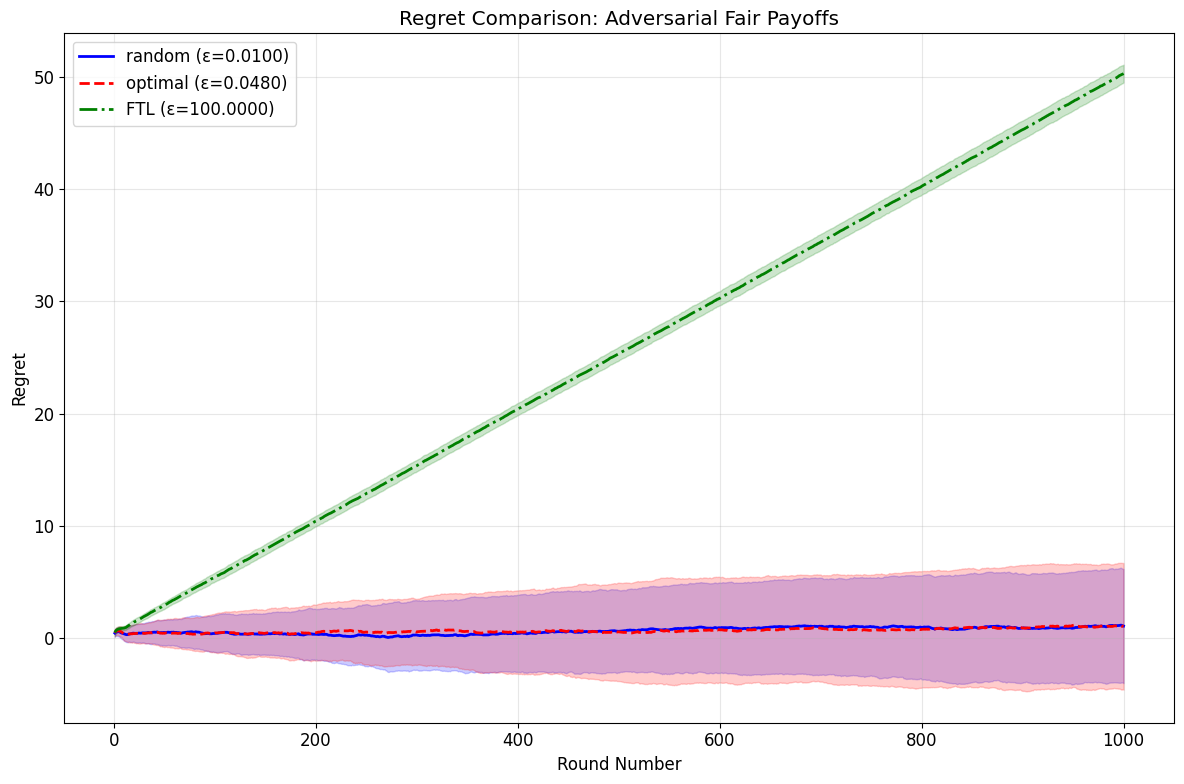

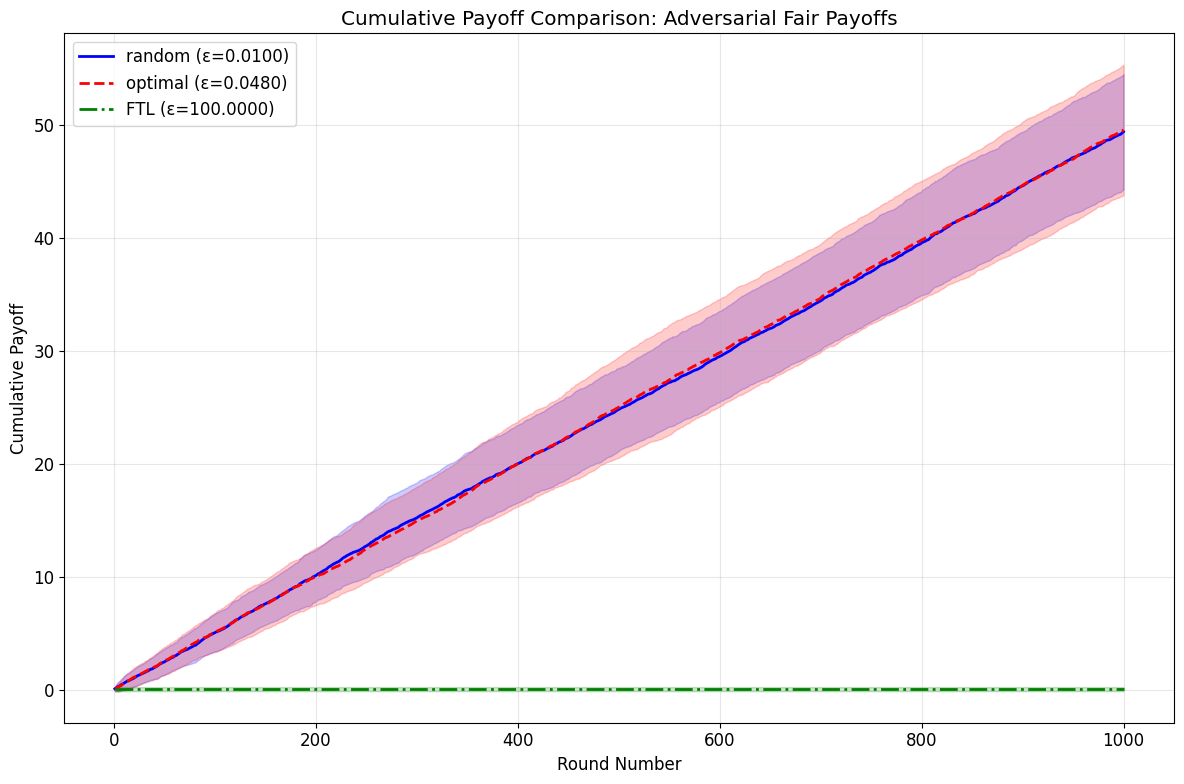

In [6]:
# Import visualization functions and run plots
import visualization

# Load the data
adversarial_df = pd.read_csv(adversarial_csv_path)

# Use the plot_regret_comparison function from visualization.py
visualization.plot_regret_comparison(adversarial_df, 'Adversarial Fair Payoffs', 'adversarial_regret_comparison.png')

# Plot payoff progression if data is available
visualization.plot_payoff_comparison(adversarial_df, "Adversarial Fair Payoffs", "afp_payoff_progression.png")

# B

In [13]:
# BernoulliPayoffs environment

# Save results
results_data_bernoulli = []
payoff_progression_data_bernoulli = {}  # Store payoff progression data for plotting

for epsilon_name, epsilon_value in epsilon_values.items():
    print(f"\nRunning simulations for {epsilon_name} (epsilon = {epsilon_value:.6f})...")
    
    regret_histories = []
    total_payoffs = []
    payoff_histories = []  # Store payoff histories for progression analysis
    
    for sim in range(num_simulations):
        env = BernoulliPayoffs(k)
        algorithm = ExponentialWeights(k, epsilon=epsilon_value, n=n)
        
        # Run algorithm
        regret_history, total_payoff, cumulative_payoffs, payoff_history = algorithm.run_algorithm(env.generate_payoffs)
        
        regret_histories.append(regret_history)
        total_payoffs.append(total_payoff)
        payoff_histories.append(payoff_history)  # Store payoff progression
        
        if (sim + 1) % 20 == 0:
            print(f"  Completed {sim + 1}/{num_simulations} simulations")
    
    # Store payoff progression data for this epsilon type
    payoff_progression_data_bernoulli[epsilon_name] = {
        'rounds': list(range(1, n + 1)),
        'mean_payoff': np.mean(payoff_histories, axis=0).tolist(),
        'std_payoff': np.std(payoff_histories, axis=0).tolist(),
        'epsilon_value': epsilon_value
    }
    
    # Add results to dataframe
    regret_array = np.array(regret_histories)
    payoff_array = np.array(payoff_histories)
    mean_regret = np.mean(regret_array, axis=0)
    std_regret = np.std(regret_array, axis=0)
    mean_payoff = np.mean(payoff_array, axis=0)
    std_payoff = np.std(payoff_array, axis=0)
    final_regrets = regret_array[:, -1]
    final_payoffs = payoff_array[:, -1]
    
    for round_num in range(n):
        results_data_bernoulli.append({
            'round': round_num + 1,
            'epsilon_type': epsilon_name,
            'epsilon_value': epsilon_value,
            'mean_regret': mean_regret[round_num],
            'std_regret': std_regret[round_num],
            'mean_payoff': mean_payoff[round_num],
            'std_payoff': std_payoff[round_num],
            'final_regret_mean': np.mean(final_regrets),
            'final_regret_std': np.std(final_regrets),
            'final_payoff_mean': np.mean(final_payoffs),
            'final_payoff_std': np.std(final_payoffs)
        })

print("\nAll simulations completed!")

results_df_bernoulli = pd.DataFrame(results_data_bernoulli)

# Save results to csv file
bernoulli_csv_path = data_dir / 'bernoulli_payoffs_results.csv'
results_df_bernoulli.to_csv(bernoulli_csv_path, index=False)
print(f"Results saved to {bernoulli_csv_path}")

# Statistical results
print("\nFinal regret statistics:")
for epsilon_name in research_eg_df["epsilon_type"].unique():
    subset = results_df_bernoulli[results_df_bernoulli['epsilon_type'] == epsilon_name]
    final_stats = subset.iloc[0]  
    print(f"  {epsilon_name}: Mean = {final_stats['final_regret_mean']:.4f}, Std = {final_stats['final_regret_std']:.4f}")



Running simulations for random (epsilon = 0.010000)...
Bernoulli probabilities for each action: [0.04431129 0.06765469 0.07512156 0.49456532 0.12226149 0.3043065
 0.13655279 0.26901127 0.21371464 0.34936117]
Bernoulli probabilities for each action: [0.09328039 0.13324673 0.06655809 0.20785789 0.40540871 0.19938607
 0.03992043 0.17242246 0.00333305 0.06954252]
Bernoulli probabilities for each action: [0.46653857 0.38807401 0.4744433  0.02649489 0.3512768  0.35068467
 0.20876304 0.2459727  0.00660981 0.3478317 ]
Bernoulli probabilities for each action: [0.27014417 0.36222509 0.28519461 0.20034661 0.19695496 0.41411396
 0.44665828 0.13528787 0.36332998 0.07971641]
Bernoulli probabilities for each action: [0.27683397 0.45941848 0.16813501 0.35239901 0.38943073 0.16153077
 0.48912589 0.09354117 0.11712824 0.31716737]
Bernoulli probabilities for each action: [0.03238237 0.28276359 0.02867412 0.20972533 0.15122828 0.24368972
 0.46042352 0.08167193 0.39879871 0.47976886]
Bernoulli probabiliti

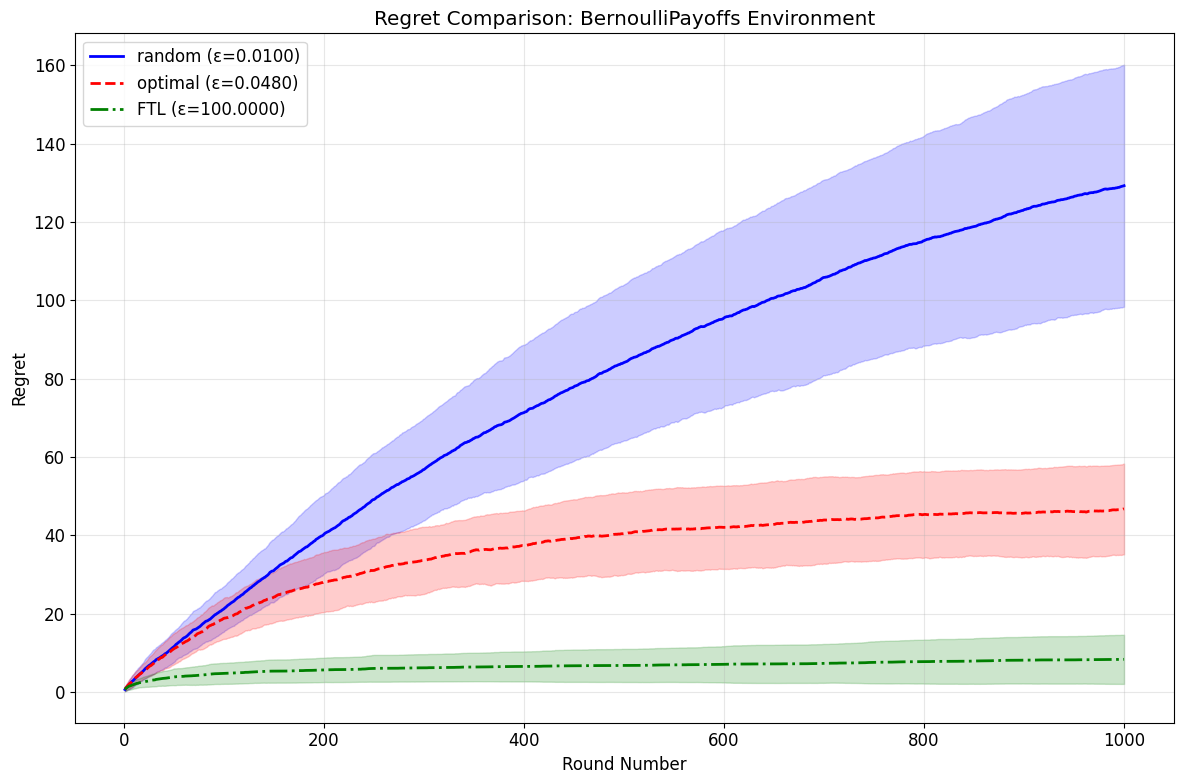

Generating payoff progression plot from CSV...


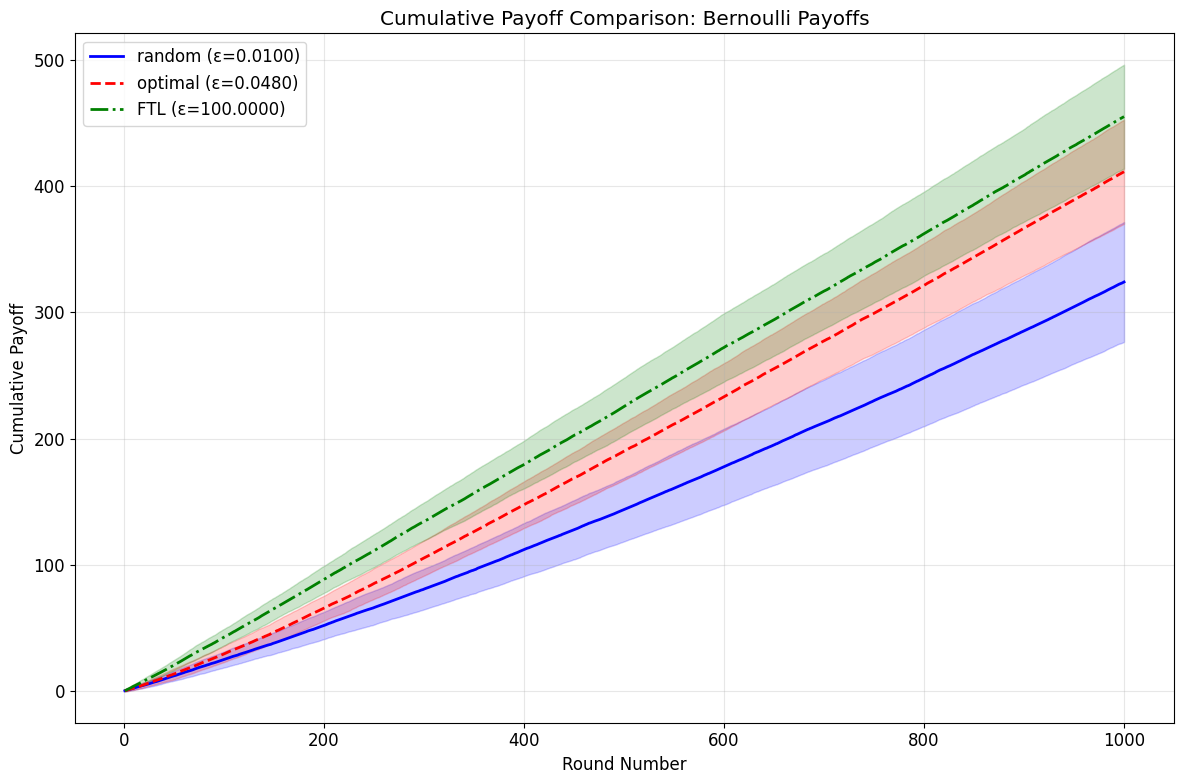

In [ ]:
# Import visualization functions and run plots
import visualization

# Load the data
bernoulli_df = pd.read_csv(bernoulli_csv_path)

# Use the plot_regret_comparison function from visualization.py
visualization.plot_regret_comparison(bernoulli_df, 'BernoulliPayoffs Environment', 'bernoulli_regret_comparison.png')

# Plot payoff progression from CSV data
visualization.plot_payoff_comparison(bernoulli_df, "Bernoulli Payoffs", "bernoulli_payoff_progression.png")


# C

In [5]:
# Load 4-store normalized data (Store_A excluded)
normalized_data = pd.read_csv(data_dir / 'espace_4stores_normalized.csv')

# Parameters for 4-store Espace analysis
k_ = 4  # 4 stores (Store_A excluded)
n = 1000
num_simulations = 10  # Reduced for demonstration

# Epsilon values for 4-store Espace analysis
epsilon_values_espace = {
    'random': 0.01,
    'optimal': np.sqrt(np.log(k_) / n),
    'FTL': 100
}

# NormalizedEspacePayoffs class for 4-store data (Store_A excluded)
class NormalizedEspacePayoffs4Stores:
    """PayoffGenerator using normalized ROI data from 4 Espace stores (Store_A excluded)"""
    
    def __init__(self, k):
        """
        Initialize normalized ROI-based payoff generator for 4 stores
        
        Args:
            k: Number of stores (4 for remaining Espace stores)
        """
        self.data = normalized_data.copy()
        self.stores = self.data['store'].unique()
        self.k = len(self.stores)
        
        # State variables
        self.current_day = 0
        # Total days should be the number of unique days, not total records
        self.total_days = self.data['day'].nunique()
        
        print(f"Initialized with {self.k} stores: {list(self.stores)}")
        print(f"Total days available: {self.total_days}")
        print(f"Store_A excluded from analysis")
        print(f"ROI data normalized to [0,1] range")
        
    def generate_payoffs(self, round_num):
        """Generate payoffs for each store using normalized ROI data"""
        if self.current_day >= self.total_days:
            # If data is exhausted, repeat the last day
            current_day_data = self.data[self.data['day'] == self.data['day'].max()]
        else:
            current_day_data = self.data[self.data['day'] == self.current_day]
        
        # Create payoffs array for all stores
        payoffs = np.zeros(self.k)
        
        # Get normalized ROI for each store on this day
        for i, store in enumerate(self.stores):
            store_data = current_day_data[current_day_data['store'] == store]
            if len(store_data) > 0:
                # Use the normalized ROI (already in [0,1] range)
                payoffs[i] = store_data['roi_normalized'].iloc[0]
            else:
                # If no data for this store on this day, use the store's mean
                store_mean = self.data[self.data['store'] == store]['roi_normalized'].mean()
                payoffs[i] = store_mean
        
        self.current_day += 1
        return payoffs
    
    def reset(self):
        """Reset state"""
        self.current_day = 0
        
    def get_transformation_info(self):
        """Get information about the applied transformations"""
        return {
            'data_points': len(self.data),
            'days': self.total_days,
            'stores': list(self.stores),
            'roi_normalized_range': [self.data['roi_normalized'].min(), self.data['roi_normalized'].max()],
            'roi_original_range': [self.data['roi'].min(), self.data['roi'].max()],
            'avg_diff_range': [self.data['avg_diff'].min(), self.data['avg_diff'].max()],
            'transformations_applied': [
                'Exponential smoothing (alpha=0.3)',
                'ROI normalization to [0,1]',
                'Store_A exclusion',
                'Data preprocessing for bandit algorithms'
            ]
        }


In [6]:
# Test the 4-store normalized data and run analysis
print("=== Testing 4-Store Normalized Data ===")

# Initialize the 4-store environment
env_4stores = NormalizedEspacePayoffs4Stores(k_)

# Display transformation info
transformation_info = env_4stores.get_transformation_info()
print("\nTransformation Information:")
for key, value in transformation_info.items():
    print(f"  {key}: {value}")

# Test payoff generation for first few rounds
print(f"\n=== Testing Payoff Generation ===")
for round_num in range(5):
    payoffs = env_4stores.generate_payoffs(round_num)
    print(f"Round {round_num + 1}: {payoffs}")

# Reset for full analysis
env_4stores.reset()

print(f"\n=== Running 4-Store Analysis ===")
print(f"Number of stores: {k_}")
print(f"Number of rounds: {n}")
print(f"Number of simulations: {num_simulations}")

# Run analysis with 4-store data
results_4stores = []
payoff_progression_4stores = {}

for epsilon_name, epsilon_value in epsilon_values_espace.items():
    print(f"\nRunning simulations for {epsilon_name} (epsilon = {epsilon_value:.6f})...")
    
    regret_histories = []
    total_payoffs = []
    payoff_histories = []
    
    for sim in range(num_simulations):
        env = NormalizedEspacePayoffs4Stores(k_)
        algorithm = ExponentialWeights(k_, epsilon=epsilon_value, n=n)
        
        # Run algorithm
        regret_history, total_payoff, cumulative_payoffs, payoff_history = algorithm.run_algorithm(env.generate_payoffs)
        
        regret_histories.append(regret_history)
        total_payoffs.append(total_payoff)
        payoff_histories.append(payoff_history)
    
    # Calculate statistics
    avg_regret = np.mean(regret_histories, axis=0)
    std_regret = np.std(regret_histories, axis=0)
    avg_total_payoff = np.mean(total_payoffs)
    std_total_payoff = np.std(total_payoffs)
    
    # Store results
    results_4stores.append({
        'epsilon_name': epsilon_name,
        'epsilon_value': epsilon_value,
        'avg_regret': avg_regret,
        'std_regret': std_regret,
        'avg_total_payoff': avg_total_payoff,
        'std_total_payoff': std_total_payoff,
        'final_regret': avg_regret[-1],
        'final_regret_std': std_regret[-1]
    })
    
    # Store payoff progression data
    payoff_progression_4stores[epsilon_name] = {
        'payoff_histories': payoff_histories,
        'avg_payoff': np.mean(payoff_histories, axis=0),
        'std_payoff': np.std(payoff_histories, axis=0)
    }
    
    print(f"  Average total payoff: {avg_total_payoff:.4f} ± {std_total_payoff:.4f}")
    print(f"  Final regret: {avg_regret[-1]:.4f} ± {std_regret[-1]:.4f}")

print(f"\n=== 4-Store Analysis Complete ===")
print(f"Results saved for {len(results_4stores)} epsilon configurations")


=== Testing 4-Store Normalized Data ===
Initialized with 4 stores: ['Store_B', 'Store_C', 'Store_D', 'Store_E']
Total days available: 365
Store_A excluded from analysis
ROI data normalized to [0,1] range

Transformation Information:
  data_points: 1460
  days: 365
  stores: ['Store_B', 'Store_C', 'Store_D', 'Store_E']
  roi_normalized_range: [np.float64(0.0), np.float64(1.0)]
  roi_original_range: [np.float64(-0.2305393579664836), np.float64(0.3198823589366818)]
  avg_diff_range: [np.float64(-230.53935796648364), np.float64(319.88235893668184)]
  transformations_applied: ['Exponential smoothing (alpha=0.3)', 'ROI normalization to [0,1]', 'Store_A exclusion', 'Data preprocessing for bandit algorithms']

=== Testing Payoff Generation ===
Round 1: [0.1565206  0.50610724 0.26017549 0.80870349]
Round 2: [0.32984673 0.48062821 0.40530511 0.80864445]
Round 3: [0.31584241 0.53152958 0.51590818 0.76147138]
Round 4: [0.36180643 0.55046559 0.45994605 0.7443184 ]
Round 5: [0.5226565  0.40118798 0.

/Users/harashimakoshi/CS332/332Project2/code/EW.py:44: RuntimeWarning: overflow encountered in power
  powers = (1 + self.epsilon) ** (self.cumulative_payoffs / self.h)


Initialized with 4 stores: ['Store_B', 'Store_C', 'Store_D', 'Store_E']
Total days available: 365
Store_A excluded from analysis
ROI data normalized to [0,1] range
Initialized with 4 stores: ['Store_B', 'Store_C', 'Store_D', 'Store_E']
Total days available: 365
Store_A excluded from analysis
ROI data normalized to [0,1] range
Initialized with 4 stores: ['Store_B', 'Store_C', 'Store_D', 'Store_E']
Total days available: 365
Store_A excluded from analysis
ROI data normalized to [0,1] range
Initialized with 4 stores: ['Store_B', 'Store_C', 'Store_D', 'Store_E']
Total days available: 365
Store_A excluded from analysis
ROI data normalized to [0,1] range
Initialized with 4 stores: ['Store_B', 'Store_C', 'Store_D', 'Store_E']
Total days available: 365
Store_A excluded from analysis
ROI data normalized to [0,1] range
Initialized with 4 stores: ['Store_B', 'Store_C', 'Store_D', 'Store_E']
Total days available: 365
Store_A excluded from analysis
ROI data normalized to [0,1] range
Initialized with

=== Creating 4-Store Analysis Visualizations ===


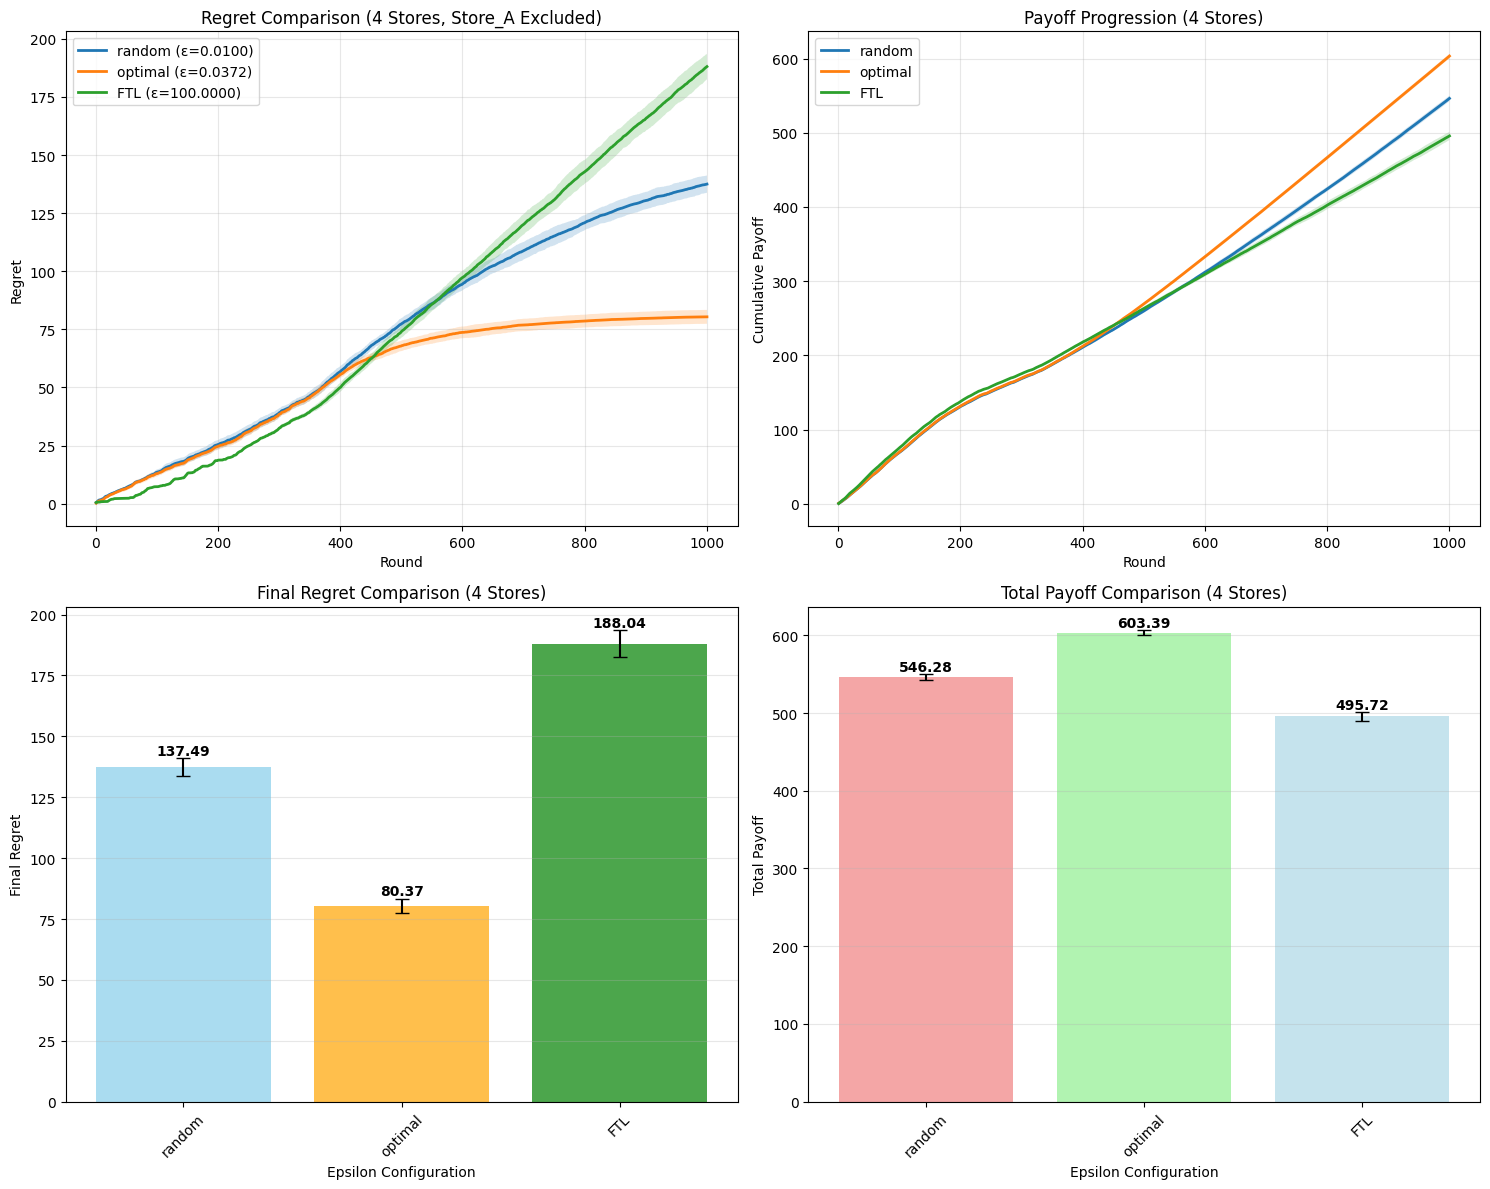

4-Store analysis visualizations saved!
Saved to: /Users/harashimakoshi/CS332/332Project2/figures/espace_4stores_analysis_results.png

=== 4-Store Analysis Summary ===
random:
  Final Regret: 137.4871 ± 3.7188
  Total Payoff: 546.2815 ± 3.7188

optimal:
  Final Regret: 80.3742 ± 2.9859
  Total Payoff: 603.3944 ± 2.9859

FTL:
  Final Regret: 188.0436 ± 5.4898
  Total Payoff: 495.7250 ± 5.4898



In [7]:
# Visualize 4-store analysis results
print("=== Creating 4-Store Analysis Visualizations ===")

# Create comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Regret comparison
ax1 = axes[0, 0]
for result in results_4stores:
    rounds = range(1, len(result['avg_regret']) + 1)
    ax1.plot(rounds, result['avg_regret'], 
             label=f"{result['epsilon_name']} (ε={result['epsilon_value']:.4f})", 
             linewidth=2)
    ax1.fill_between(rounds, 
                     result['avg_regret'] - result['std_regret'],
                     result['avg_regret'] + result['std_regret'],
                     alpha=0.2)

ax1.set_xlabel('Round')
ax1.set_ylabel('Regret')
ax1.set_title('Regret Comparison (4 Stores, Store_A Excluded)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Payoff progression
ax2 = axes[0, 1]
for epsilon_name, data in payoff_progression_4stores.items():
    rounds = range(1, len(data['avg_payoff']) + 1)
    ax2.plot(rounds, data['avg_payoff'], 
             label=f"{epsilon_name}", 
             linewidth=2)
    ax2.fill_between(rounds, 
                     data['avg_payoff'] - data['std_payoff'],
                     data['avg_payoff'] + data['std_payoff'],
                     alpha=0.2)

ax2.set_xlabel('Round')
ax2.set_ylabel('Cumulative Payoff')
ax2.set_title('Payoff Progression (4 Stores)')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. Final regret comparison
ax3 = axes[1, 0]
epsilon_names = [r['epsilon_name'] for r in results_4stores]
final_regrets = [r['final_regret'] for r in results_4stores]
final_regret_stds = [r['final_regret_std'] for r in results_4stores]

bars = ax3.bar(epsilon_names, final_regrets, yerr=final_regret_stds, 
               capsize=5, alpha=0.7, color=['skyblue', 'orange', 'green'])
ax3.set_xlabel('Epsilon Configuration')
ax3.set_ylabel('Final Regret')
ax3.set_title('Final Regret Comparison (4 Stores)')
ax3.tick_params(axis='x', rotation=45)
ax3.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar, value, std in zip(bars, final_regrets, final_regret_stds):
    ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + std + 0.1, 
             f'{value:.2f}', ha='center', va='bottom', fontweight='bold')

# 4. Total payoff comparison
ax4 = axes[1, 1]
total_payoffs = [r['avg_total_payoff'] for r in results_4stores]
total_payoff_stds = [r['std_total_payoff'] for r in results_4stores]

bars = ax4.bar(epsilon_names, total_payoffs, yerr=total_payoff_stds, 
               capsize=5, alpha=0.7, color=['lightcoral', 'lightgreen', 'lightblue'])
ax4.set_xlabel('Epsilon Configuration')
ax4.set_ylabel('Total Payoff')
ax4.set_title('Total Payoff Comparison (4 Stores)')
ax4.tick_params(axis='x', rotation=45)
ax4.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar, value, std in zip(bars, total_payoffs, total_payoff_stds):
    ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + std + 0.1, 
             f'{value:.2f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig(figures_dir / 'espace_4stores_analysis_results.png', dpi=300, bbox_inches='tight')
plt.show()

print("4-Store analysis visualizations saved!")
print(f"Saved to: {figures_dir / 'espace_4stores_analysis_results.png'}")

# Print summary results
print(f"\n=== 4-Store Analysis Summary ===")
for result in results_4stores:
    print(f"{result['epsilon_name']}:")
    print(f"  Final Regret: {result['final_regret']:.4f} ± {result['final_regret_std']:.4f}")
    print(f"  Total Payoff: {result['avg_total_payoff']:.4f} ± {result['std_total_payoff']:.4f}")
    print()


# D

In [14]:
# D - Research Payoffs with Cluster-based Paper Selection and Markov Regime Switching

# Import Exponentiated Gradient
from EG import ExponentiatedGradientFI

# Parameters for Research Payoffs (new specification)
num_clusters = 4  # Number of clusters (3 or more)
papers_per_cluster = 8  # Papers per cluster
total_papers = num_clusters * papers_per_cluster  # Total number of papers
selected_papers = num_clusters * 3  # Fixed: 3 papers per cluster
n_research = 1000

# Epsilon values for Research Payoffs (using sqrt(2*log(k)/t) formula)
epsilon_values_research = {
    'random': 0.01,
    'optimal': np.sqrt(2 * np.log(selected_papers) / n_research),  # ε_t = √(2 log k / t) where k = selected_papers
    'FTL': 100.0  # FTL uses large epsilon
}

# Initialize Research Payoffs model (new specification)
research_model = ResearchPayoffs(
    num_clusters=num_clusters,
    papers_per_cluster=papers_per_cluster,
    regime_switch_prob=0.3,  # 30% chance to switch regime
    seed=42
)

print("Research Payoffs Environment Info:")
print(f"  Number of clusters: {research_model.num_clusters}")
print(f"  Papers per cluster: {research_model.papers_per_cluster}")
print(f"  Total papers: {research_model.total_papers}")
print(f"  Selected papers per round: {research_model.papers_per_round}")
print(f"  Current regime: {research_model.current_regime}")
# Get cluster information for researcher
cluster_info = research_model.get_cluster_info_for_researcher()
print(f"  Cluster mapping: {cluster_info['cluster_mapping']}")
print()

# Run simulations for each epsilon value
research_results = []
results_data_research = []
payoff_progression_data_research = {}  # Store payoff progression data for plotting

# Initialize payoff progression data structure
for epsilon_name in epsilon_values_research.keys():
    payoff_progression_data_research[epsilon_name] = {
        'rounds': list(range(1, n_research + 1)),
        'payoff_histories': []
    }

for sim in range(num_simulations):
    if sim % 20 == 0:
        print(f"Research simulation {sim}/{num_simulations}")
    
    for epsilon_name, epsilon_value in epsilon_values_research.items():
        # Reset model for each simulation
        research_model.reset()
        
        # Initialize EG algorithm with selected_papers as k
        eg = ExponentiatedGradientFI(k=selected_papers, epsilon=epsilon_value, n=n_research)
        
        # Create payoff generator that returns only alpha for selected papers
        def payoff_generator(round_num):
            alpha, selected_papers = research_model.generate_payoffs(round_num)
            # Return only alpha values for selected papers
            return np.array([alpha[paper_id] for paper_id in selected_papers])
        
        # Run algorithm
        regret_history, total_payoff, cumulative_payoffs, payoff_history = eg.run(payoff_generator)
        
        # Store payoff progression
        payoff_progression_data_research[epsilon_name]['payoff_histories'].append(payoff_history)
        
        # Store results
        research_results.append({
            'simulation': sim,
            'epsilon_type': epsilon_name,
            'epsilon_value': epsilon_value,
            'regret_history': regret_history,
            'total_payoff': total_payoff,
            'cumulative_regret': regret_history[-1] if len(regret_history) > 0 else 0
        })

print("\nResearch Payoffs simulation completed!")
print(f"Total results: {len(research_results)}")

# Calculate mean and std for payoff progression
for epsilon_name in epsilon_values_research.keys():
    payoff_histories = payoff_progression_data_research[epsilon_name]['payoff_histories']
    payoff_progression_data_research[epsilon_name]['mean_payoff'] = np.mean(payoff_histories, axis=0).tolist()
    payoff_progression_data_research[epsilon_name]['std_payoff'] = np.std(payoff_histories, axis=0).tolist()
    payoff_progression_data_research[epsilon_name]['epsilon_value'] = epsilon_values_research[epsilon_name]
    # Remove the raw histories to save memory
    del payoff_progression_data_research[epsilon_name]['payoff_histories']

# Prepare data for visualization (with payoff data)
for epsilon_name in epsilon_values_research.keys():
    # Get all results for this epsilon type
    epsilon_results = [r for r in research_results if r['epsilon_type'] == epsilon_name]
    all_regrets = [r['regret_history'] for r in epsilon_results]
    
    # Calculate mean and std for each round
    mean_regret = np.mean(all_regrets, axis=0)
    std_regret = np.std(all_regrets, axis=0)
    mean_payoff = payoff_progression_data_research[epsilon_name]['mean_payoff']
    std_payoff = payoff_progression_data_research[epsilon_name]['std_payoff']
    
    # Create data for each round
    for round_num in range(n_research):
        results_data_research.append({
            'round': round_num + 1,
            'epsilon_type': epsilon_name,
            'epsilon_value': epsilon_values_research[epsilon_name],
            'mean_regret': mean_regret[round_num],
            'std_regret': std_regret[round_num],
            'mean_payoff': mean_payoff[round_num],
            'std_payoff': std_payoff[round_num],
            'final_regret_mean': np.mean([r['cumulative_regret'] for r in epsilon_results]),
            'final_regret_std': np.std([r['cumulative_regret'] for r in epsilon_results]),
            'final_payoff_mean': np.mean([r['total_payoff'] for r in epsilon_results]),
            'final_payoff_std': np.std([r['total_payoff'] for r in epsilon_results])
        })

research_plot_df = pd.DataFrame(results_data_research)

# Save results to CSV
research_plot_df.to_csv(data_dir / 'research_payoffs_cluster_results.csv', index=False)
print(f"Results saved to: {data_dir / 'research_payoffs_cluster_results.csv'}")

# Statistical results
print("\nFinal regret statistics:")
for epsilon_name in epsilon_values_research.keys():
    subset = research_plot_df[research_plot_df['epsilon_type'] == epsilon_name]
    final_stats = subset.iloc[0]
    print(f"  {epsilon_name}: Mean = {final_stats['final_regret_mean']:.4f}, Std = {final_stats['final_regret_std']:.4f}")

Research Payoffs Environment Info:
  Number of clusters: 4
  Papers per cluster: 8
  Total papers: 32
  Selected papers per round: 12
  Current regime: 0
  Cluster mapping: {0: 0, 1: 0, 2: 0, 3: 1, 4: 1, 5: 1, 6: 2, 7: 2, 8: 2, 9: 3, 10: 3, 11: 3}

Research simulation 0/100
Research simulation 20/100
Research simulation 40/100
Research simulation 60/100
Research simulation 80/100

Research Payoffs simulation completed!
Total results: 300
Results saved to: /Users/harashimakoshi/CS332/332Project2/data/research_payoffs_cluster_results.csv

Final regret statistics:
  random: Mean = 19.6532, Std = 7.6373
  optimal: Mean = 16.3515, Std = 4.1526
  FTL: Mean = 15.1932, Std = 13.6417


In [ ]:
# リグレット比較とペイオフ進行の個別画像を保存
print("=== 個別画像の保存 ===")

# 1. リグレット比較の個別画像
plt.figure(figsize=(12, 8))
for result in results_4stores:
    rounds = range(1, len(result['avg_regret']) + 1)
    plt.plot(rounds, result['avg_regret'], 
             label=f"{result['epsilon_name']} (ε={result['epsilon_value']:.4f})", 
             linewidth=2)
    plt.fill_between(rounds, 
                     result['avg_regret'] - result['std_regret'],
                     result['avg_regret'] + result['std_regret'],
                     alpha=0.2)

plt.xlabel('Round', fontsize=12)
plt.ylabel('Regret', fontsize=12)
plt.title('Regret Comparison (4 Stores, Store_A Excluded)', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()

# リグレット比較画像を保存
regret_fig_path = figures_dir / 'espace_4stores_regret_comparison.png'
plt.savefig(regret_fig_path, dpi=300, bbox_inches='tight')
plt.show()
print(f"リグレット比較画像を保存: {regret_fig_path}")

# 2. ペイオフ進行の個別画像
plt.figure(figsize=(12, 8))
for epsilon_name, data in payoff_progression_4stores.items():
    rounds = range(1, len(data['avg_payoff']) + 1)
    plt.plot(rounds, data['avg_payoff'], 
             label=f"{epsilon_name}", 
             linewidth=2)
    plt.fill_between(rounds, 
                     data['avg_payoff'] - data['std_payoff'],
                     data['avg_payoff'] + data['std_payoff'],
                     alpha=0.2)

plt.xlabel('Round', fontsize=12)
plt.ylabel('Cumulative Payoff', fontsize=12)
plt.title('Payoff Progression (4 Stores)', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()

# ペイオフ進行画像を保存
payoff_fig_path = figures_dir / 'espace_4stores_payoff_progression.png'
plt.savefig(payoff_fig_path, dpi=300, bbox_inches='tight')
plt.show()
print(f"ペイオフ進行画像を保存: {payoff_fig_path}")

# 3. 最終リグレット比較の個別画像
plt.figure(figsize=(10, 6))
epsilon_names = [r['epsilon_name'] for r in results_4stores]
final_regrets = [r['final_regret'] for r in results_4stores]
final_regret_stds = [r['final_regret_std'] for r in results_4stores]

bars = plt.bar(epsilon_names, final_regrets, yerr=final_regret_stds, 
               capsize=5, alpha=0.7, color=['skyblue', 'orange', 'green'])
plt.xlabel('Epsilon Configuration', fontsize=12)
plt.ylabel('Final Regret', fontsize=12)
plt.title('Final Regret Comparison (4 Stores)', fontsize=14, fontweight='bold')
plt.tick_params(axis='x', rotation=45)
plt.grid(True, alpha=0.3, axis='y')

# バーの上に値を表示
for bar, value, std in zip(bars, final_regrets, final_regret_stds):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + std + 0.1, 
             f'{value:.2f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()

# 最終リグレット比較画像を保存
final_regret_fig_path = figures_dir / 'espace_4stores_final_regret_comparison.png'
plt.savefig(final_regret_fig_path, dpi=300, bbox_inches='tight')
plt.show()
print(f"最終リグレット比較画像を保存: {final_regret_fig_path}")

# 4. 総ペイオフ比較の個別画像
plt.figure(figsize=(10, 6))
total_payoffs = [r['avg_total_payoff'] for r in results_4stores]
total_payoff_stds = [r['std_total_payoff'] for r in results_4stores]

bars = plt.bar(epsilon_names, total_payoffs, yerr=total_payoff_stds, 
               capsize=5, alpha=0.7, color=['lightcoral', 'lightgreen', 'lightblue'])
plt.xlabel('Epsilon Configuration', fontsize=12)
plt.ylabel('Total Payoff', fontsize=12)
plt.title('Total Payoff Comparison (4 Stores)', fontsize=14, fontweight='bold')
plt.tick_params(axis='x', rotation=45)
plt.grid(True, alpha=0.3, axis='y')

# バーの上に値を表示
for bar, value, std in zip(bars, total_payoffs, total_payoff_stds):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + std + 0.1, 
             f'{value:.2f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()

# 総ペイオフ比較画像を保存
total_payoff_fig_path = figures_dir / 'espace_4stores_total_payoff_comparison.png'
plt.savefig(total_payoff_fig_path, dpi=300, bbox_inches='tight')
plt.show()
print(f"総ペイオフ比較画像を保存: {total_payoff_fig_path}")

print(f"\n=== 個別画像保存完了 ===")
print(f"保存された画像:")
print(f"1. リグレット比較: {regret_fig_path}")
print(f"2. ペイオフ進行: {payoff_fig_path}")
print(f"3. 最終リグレット比較: {final_regret_fig_path}")
print(f"4. 総ペイオフ比較: {total_payoff_fig_path}")
print(f"すべて高解像度（300 DPI）で保存されました。")


Research Payoffs Cluster Results - Data Overview:
Shape: (3000, 11)
Columns: ['round', 'epsilon_type', 'epsilon_value', 'mean_regret', 'std_regret', 'mean_payoff', 'std_payoff', 'final_regret_mean', 'final_regret_std', 'final_payoff_mean', 'final_payoff_std']
Epsilon types: ['random' 'optimal' 'FTL']

Generating regret comparison plot...


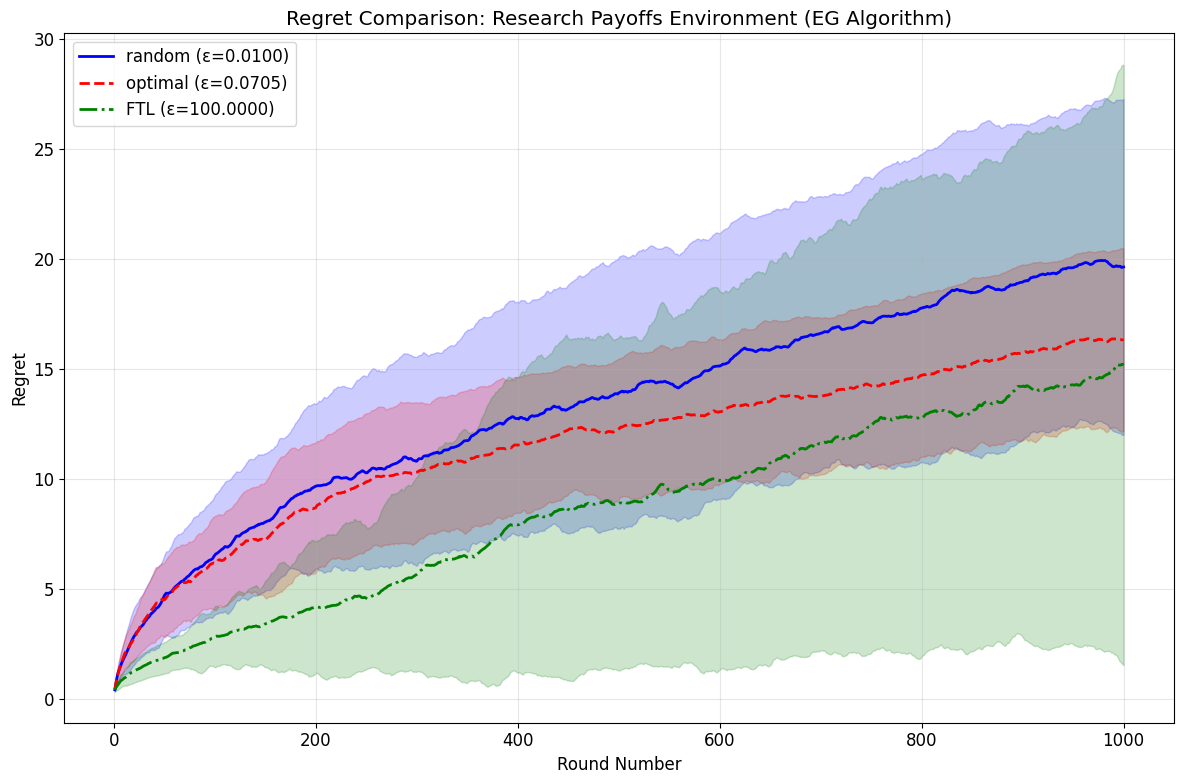

Generating payoff progression plot from CSV...


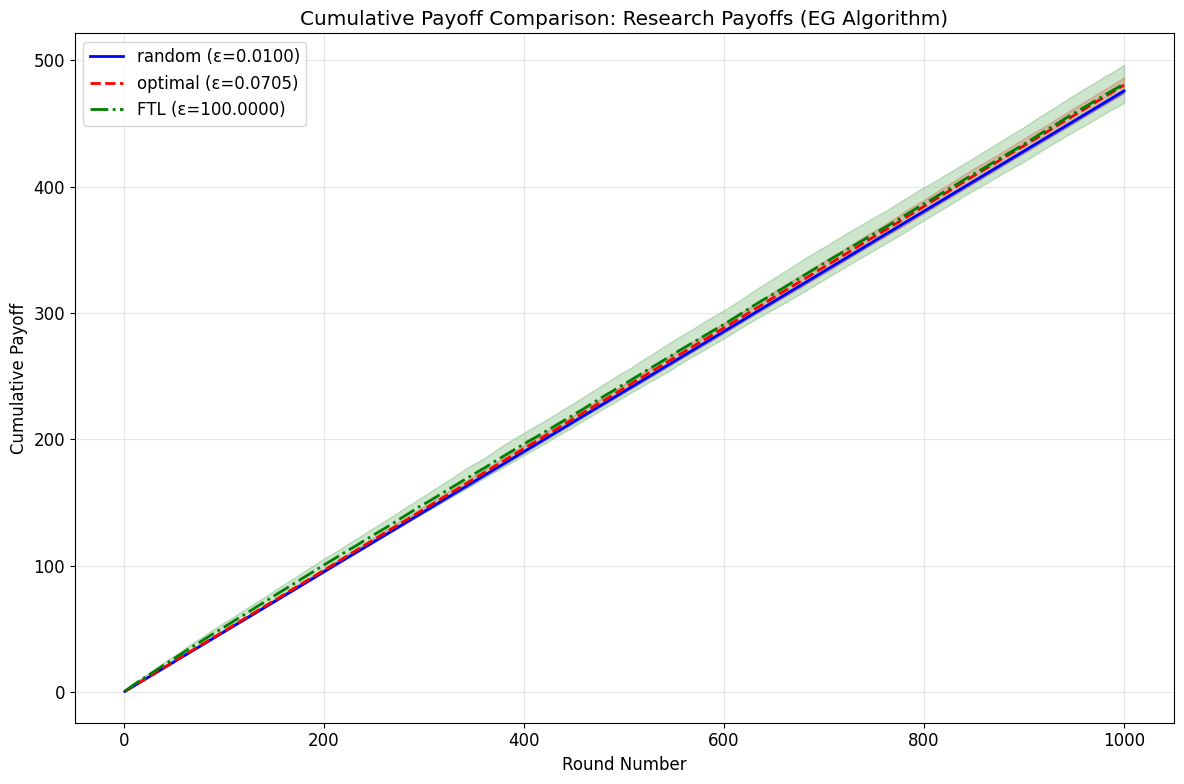


Research Payoffs Cluster - Summary Statistics:
random (ε=0.010000):
  Final Regret: 19.6532 ± 7.6373
  Total Payoff: 475.6582 ± 1.5057

optimal (ε=0.070497):
  Final Regret: 16.3515 ± 4.1526
  Total Payoff: 480.2657 ± 6.0042

FTL (ε=100.000000):
  Final Regret: 15.1932 ± 13.6417
  Total Payoff: 481.3379 ± 15.1035

Weight Evolution Analysis:
Final weight distribution (all selected papers):
  Paper 0 (Cluster 0, high): 0.3821
  Paper 1 (Cluster 0, high): 0.2442
  Paper 2 (Cluster 0, high): 0.3194
  Paper 3 (Cluster 1, high): 0.0197
  Paper 4 (Cluster 1, high): 0.0144
  Paper 5 (Cluster 1, high): 0.0147
  Paper 6 (Cluster 2, high): 0.0014
  Paper 7 (Cluster 2, high): 0.0007
  Paper 8 (Cluster 2, middle): 0.0009
  Paper 9 (Cluster 3, middle): 0.0004
  Paper 10 (Cluster 3, middle): 0.0009
  Paper 11 (Cluster 3, middle): 0.0011

Total payoff: 506.6534
Final regret: 22.7321

Cluster Information:
  Current regime: 0
  High cluster: 0
  Middle cluster: 1
  Low clusters: [2, 3]
  Cluster mappin

In [15]:
# Research Payoffs Visualization - Regret and Payoff Progression

import visualization

# Load the data
research_cluster_df = pd.read_csv(data_dir / 'research_payoffs_cluster_results.csv')

print("Research Payoffs Cluster Results - Data Overview:")
print(f"Shape: {research_cluster_df.shape}")
print(f"Columns: {list(research_cluster_df.columns)}")
print(f"Epsilon types: {research_cluster_df['epsilon_type'].unique()}")
print()

# Use the plot_regret_comparison function from visualization.py
print("Generating regret comparison plot...")
visualization.plot_regret_comparison(
    research_cluster_df,
    'Research Payoffs Environment (EG Algorithm)',
    'research_cluster_regret_comparison.png'
)

# Plot payoff progression from CSV data
print("Generating payoff progression plot from CSV...")
visualization.plot_payoff_comparison(
    research_cluster_df,
    "Research Payoffs (EG Algorithm)",
    "research_cluster_payoff_progression.png"
)

# Summary statistics
print("\nResearch Payoffs Cluster - Summary Statistics:")
print("=" * 50)

for epsilon_name in research_cluster_df["epsilon_type"].unique():
    subset = research_cluster_df[research_cluster_df["epsilon_type"] == epsilon_name]
    final_regrets = subset['final_regret_mean'].iloc[0]
    final_regret_std = subset['final_regret_std'].iloc[0]
    total_payoffs = subset['final_payoff_mean'].iloc[0]
    total_payoff_std = subset['final_payoff_std'].iloc[0]
    
    print(f"{epsilon_name} (ε={subset['epsilon_value'].iloc[0]:.6f}):")
    print(f"  Final Regret: {final_regrets:.4f} ± {final_regret_std:.4f}")
    print(f"  Total Payoff: {total_payoffs:.4f} ± {total_payoff_std:.4f}")
    print()

# Weight evolution analysis (for a single simulation)
print("Weight Evolution Analysis:")
print("=" * 30)

# Run a single simulation to analyze weight evolution
num_clusters_test = 4
papers_per_cluster_test = 8
selected_papers_test = num_clusters_test * 3  # Fixed: 3 papers per cluster
n_research_test = 1000

# Test with optimal epsilon (using selected_papers)
epsilon_optimal = np.sqrt(2 * np.log(selected_papers_test) / n_research_test)
research_model_test = ResearchPayoffs(
    num_clusters=num_clusters_test,
    papers_per_cluster=papers_per_cluster_test,
    regime_switch_prob=0.3,
    seed=42
)
eg_test = ExponentiatedGradientFI(k=selected_papers_test, epsilon=epsilon_optimal, n=n_research_test)

# Create payoff generator for EG
def payoff_generator_test(round_num):
    alpha, selected_papers = research_model_test.generate_payoffs(round_num)
    return np.array([alpha[paper_id] for paper_id in selected_papers])

# Run algorithm
regret_history, total_payoff, cumulative_payoffs, payoff_history = eg_test.run(payoff_generator_test)
weight_history = eg_test.get_weight_history()

# Analyze final weights
final_weights = weight_history[-1, :]
print("Final weight distribution (all selected papers):")
for i, weight in enumerate(final_weights):
    # Get cluster information for this paper index
    cluster_mapping = research_model_test.get_cluster_mapping()
    cluster_id = cluster_mapping[i]
    classification = research_model_test.get_paper_classification(i)
    print(f"  Paper {i} (Cluster {cluster_id}, {classification}): {weight:.4f}")

print(f"\nTotal payoff: {total_payoff:.4f}")
print(f"Final regret: {regret_history[-1]:.4f}")

# Show cluster information
print("\nCluster Information:")
cluster_info = research_model_test.get_cluster_info_for_researcher()
print(f"  Current regime: {cluster_info['current_regime']}")
print(f"  High cluster: {cluster_info['high_cluster']}")
print(f"  Middle cluster: {cluster_info['middle_cluster']}")
print(f"  Low clusters: {cluster_info['low_clusters']}")
print(f"  Cluster mapping: {cluster_info['cluster_mapping']}")
